<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/DosEJES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pylab import *
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
covid="https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"
muestras="https://www.datos.gov.co/api/views/8835-5baf/rows.csv?accessType=DOWNLOAD"

In [ ]:
muestras_acumuladas = pd.read_csv(muestras).iloc[1:,[0,1]].reset_index(drop=True)
muestras_acumuladas.Fecha=pd.to_datetime(muestras_acumuladas.Fecha,format="%Y-%m-%d")
muestras_acumuladas["dia_antes"]=muestras_acumuladas.Acumuladas.shift(-1)
muestras_acumuladas["diarias"]=-muestras_acumuladas.Acumuladas+muestras_acumuladas.dia_antes

In [ ]:
grafico_muestras=go.Figure(go.Scatter(x=muestras_acumuladas.Fecha,
                                      y= muestras_acumuladas.diarias))

In [ ]:
grafico_muestras2= go.Figure(go.Scatter(x=muestras_acumuladas.Fecha,
                                        y=muestras_acumuladas.Acumuladas))

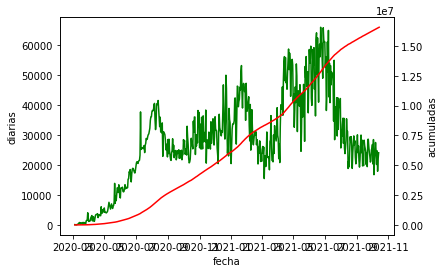

In [ ]:
fig, ax= subplots()

twin1=ax.twinx()
# twin2=ax.twinx()

p1, =ax.plot(muestras_acumuladas.Fecha,
             muestras_acumuladas.diarias,
             "g",label="diarias")
p2, = twin1.plot(muestras_acumuladas.Fecha,
                 muestras_acumuladas.Acumuladas,
                 "r",label="Acumuladas")
ax.set_xlabel("fecha")
ax.set_ylabel("diarias")
twin1.set_ylabel("acumuladas")
show()

In [ ]:
grafico_muestras3=muestras_acumuladas.set_index("Fecha")["diarias"]

In [ ]:
grafico_muestras3.index

DatetimeIndex(['2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14',
               ...
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14'],
              dtype='datetime64[ns]', name='Fecha', length=589, freq=None)